In [27]:
import pandas as pd

data = pd.read_csv('data/rolling_stones_lyrics_archive.csv')

# Keep only songs which are from albums, disregard the rest
data = data[data.album_type == 'album']
print("Total songs in the data set: {}".format(len(data)))

print("Length of max song: {}".format(data.song_lyrics.map(lambda x: len(x)).max()))
# print(data[data.song_lyrics.map(len) == data.song_lyrics.map(lambda x: len(x)).max()])
print("Length of min song: {}".format(data.song_lyrics.map(lambda x: len(x)).min()))
# print(data[data.song_lyrics.map(len) == data.song_lyrics.map(lambda x: len(x)).min()])


Total songs in the data set: 297
Length of max song: 2505
Length of min song: 235


In [34]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep="\t", header=None)

# LABELS = {'anger': 0, 'anticipation': 1, 'disgust': 2, 'fear': 3, 'joy': 4, 
#           'negative': 5, 'positive': 6, 'sadness': 7, 'surprise': 8, 'trust': 9}

LABELS = {'anger': 0, 'anticipation': 1, 'disgust': 2, 'fear': 3, 'joy': 4, 
          'sadness': 5, 'surprise': 6, 'trust': 7}

data.columns = ['word', 'label_name', 'label_value']

data = data[data['label_value'] == 1]
data = data[data['label_name'] != 'negative']
data = data[data['label_name'] != 'positive']

data['label_int'] = [LABELS[label_name] for label_name in data.label_name]
data = data[['word', 'label_int']]

# data = data[data.label_int != 5] # remove negative labels
# data = data[data.label_int != 6] # remove positive labels

print(data)

train, val = train_test_split(data)

train.to_csv('nrc_emotion_train_v2.txt', sep='\t', encoding='utf-8')
val.to_csv('nrc_emotion_val_v2.txt', sep='\t', encoding='utf-8')



               word  label_int
19           abacus          7
23          abandon          3
27          abandon          5
30        abandoned          0
33        abandoned          3
37        abandoned          5
40      abandonment          0
43      abandonment          3
47      abandonment          5
48      abandonment          6
89            abbot          7
133       abduction          3
137       abduction          5
138       abduction          6
152      aberration          2
170           abhor          0
172           abhor          2
173           abhor          3
180       abhorrent          0
182       abhorrent          2
183       abhorrent          3
212          abject          2
242        abnormal          2
270         abolish          0
292      abominable          2
293      abominable          3
300     abomination          0
302     abomination          2
303     abomination          3
332        abortion          2
...             ...        ...
141233  

In [22]:
import torch
from torch.utils.data import Dataset
from transformers.modeling_albert import AlbertTokenizer
import pandas as pd

class NRCEmotionDataset(Dataset):

    def __init__(self, filename, max_len):
        self.df = pd.read_csv(filename, delimiter = '\t')
        self.tokenizer = AlbertTokenizer.from_pretrained('albert-base-v1')
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):

        # Selecting the sentence and label at the specified index in the data frame
        sentence = self.df.loc[index, 'sentence']
        label = self.df.loc[index, 'label']

        # Preprocessing the text to be suitable for Albert
        tokens = self.tokenizer.tokenize(sentence) 
        tokens = ['[CLS]'] + tokens + ['[SEP]'] 
        if len(tokens) < self.maxlen:
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))] 
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]'] # Prunning the list to be of specified max length

        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens) # Obtaining the indices of the tokens in the Albert Vocabulary
        tokens_ids_tensor = torch.tensor(tokens_ids) # Converting the list to a pytorch tensor

        #Obtaining the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attn_mask = (tokens_ids_tensor != 0).long()

        return tokens_ids_tensor, attn_mask, label

ModuleNotFoundError: No module named 'transformers.modeling_albert'

In [79]:
import pandas as pd

df = pd.read_csv('results/ibm_watson_results.csv')

# idx = df.groupby(['Mt'])['count'].transform(max) == df['count']

df = df[df.groupby(['song_name'])['score'].transform(max) == df['score']]

original_df = pd.read_csv('data/rolling_stones_lyrics_archive.csv')
original_df = data[data.album_type == 'album']

result = pd.merge(original_df, df, how='left', on='song_name', sort=False)
result = result.drop_duplicates()

result.to_csv('results/ibm_watson_max_scores_only.csv')

In [3]:

from transformers import AlbertForSequenceClassification

model = AlbertForSequenceClassification.from_pretrained("albert-base-v1", num_labels=10)

ImportError: cannot import name 'AlbertForSequenceClassification'

In [2]:
print(model)

NameError: name 'model' is not defined

In [25]:
import torch 

tensor = torch.tensor([[-5.8102e-01, -4.8652e-01,  1.6989e-02, -2.3317e-01, -8.4844e-02,
          2.2781e-01,  1.1011e-01,  2.6841e-01,  1.7193e-01, -1.4409e-01],
        [-6.6239e-01, -6.9179e-01, -1.3900e-01, -2.1670e-01,  4.2466e-01,
          1.1396e-01,  4.7541e-01,  4.8173e-01, -5.4343e-02,  4.2430e-02],
        [-6.9591e-01, -4.1637e-01,  3.8173e-02, -4.7221e-01, -2.9757e-01,
         -2.2314e-04,  1.1759e-01,  3.1252e-01,  2.8972e-02, -2.9129e-01],
        [-1.0893e-01, -1.9238e-02, -2.3280e-01,  1.1456e-01, -1.0139e-04,
          3.1431e-01, -1.9187e-01,  4.8717e-01, -2.9358e-01,  1.5639e-03],
        [-3.3618e-01, -3.4956e-01, -1.7288e-01, -3.8273e-02, -6.0551e-02,
          2.2593e-01,  1.5948e-01,  9.8995e-02,  1.8259e-01, -1.2844e-01],
        [-5.3179e-01, -3.8206e-01, -1.7259e-01, -3.9133e-01,  9.1039e-02,
          2.0787e-01, -1.3923e-03,  5.7119e-01,  1.1686e-01, -1.8729e-02],
        [-5.0053e-01, -4.2025e-01, -1.7148e-01, -2.7694e-01,  1.1030e-01,
          1.1310e-03,  1.0596e-01,  2.5817e-01,  1.9920e-01, -2.3730e-01],
        [-2.2809e-01, -5.1331e-01,  2.0137e-02, -1.8121e-01, -1.9581e-01,
          2.5628e-02, -4.4066e-02,  2.4048e-01,  2.0404e-01, -1.3864e-01],
        [-5.3965e-01, -5.6810e-01, -6.8893e-02, -3.6103e-01,  6.9097e-02,
          3.3039e-02,  2.7640e-01,  3.7114e-01,  1.4122e-01, -1.9242e-01],
        [-6.1244e-01, -4.1625e-01,  1.9178e-01, -1.7446e-01, -2.5497e-01,
          5.5475e-02,  4.8141e-02,  1.6027e-01,  2.2191e-01,  4.8715e-03],
        [-4.7436e-01, -3.8904e-01,  1.1825e-01, -5.1000e-01,  1.8593e-01,
          5.4257e-02,  2.3463e-01,  2.7962e-01,  6.8198e-02, -1.6704e-01],
        [-9.2181e-02, -2.4422e-01,  9.0058e-02,  1.0442e-01, -1.1409e-01,
          3.3713e-01, -3.9902e-01,  5.7602e-02,  3.2468e-01,  1.8515e-01],
        [-4.7494e-01, -8.9453e-02, -2.5355e-02, -2.3098e-02, -1.7058e-02,
          1.5212e-01,  2.9384e-01,  2.6579e-01,  1.1241e-01,  2.4247e-02],
        [-3.6367e-01, -2.8740e-01, -7.7958e-02, -2.8186e-01, -1.0089e-01,
          1.7049e-01,  9.8250e-02,  1.7182e-01,  1.2986e-01, -3.0508e-01],
        [-4.2589e-01, -4.0560e-01, -8.1744e-03,  4.6994e-03,  1.7483e-01,
         -1.0552e-01,  2.0409e-01,  5.3570e-01, -8.3250e-02,  1.4169e-02],
        [-3.9088e-01, -4.1374e-01, -1.5115e-01, -3.7451e-01,  4.5584e-02,
          9.3765e-02,  1.5766e-01, -4.7763e-03, -1.9264e-02, -6.5446e-02],
        [-4.4248e-01, -3.1773e-01,  1.1189e-01,  1.2411e-02,  3.3295e-02,
          2.0532e-01,  2.9403e-01,  3.3254e-01,  1.5953e-01, -2.3550e-01],
        [-4.7528e-01, -1.9713e-01, -3.2748e-01, -1.1747e-01,  9.7646e-02,
          5.7958e-02,  1.3616e-01,  3.7431e-01, -7.0752e-02, -4.9861e-02],
        [-3.2322e-01, -4.2223e-01,  2.0503e-01, -2.2718e-01, -1.2423e-01,
          5.0185e-02,  3.0429e-01,  6.0663e-01,  1.1795e-01,  7.3514e-02],
        [-4.8989e-01, -3.2898e-01,  1.5526e-02, -2.6319e-01,  8.7479e-02,
          4.3098e-01,  1.8536e-01,  2.9469e-01, -7.4611e-02,  2.8604e-02],
        [-7.4760e-01, -5.2081e-01, -1.7924e-02, -5.4295e-01,  1.9097e-01,
          1.7938e-01,  1.3739e-01,  2.3138e-01,  5.9824e-02, -3.2283e-02],
        [-3.6481e-01, -1.7149e-01, -1.6484e-01, -4.4473e-01,  1.2361e-01,
          2.4318e-01,  8.5134e-02,  1.3687e-01,  1.3308e-03, -9.4903e-02],
        [-4.6334e-01, -1.0163e-01,  9.2553e-03, -7.9301e-02,  2.0969e-02,
          1.6064e-02,  2.3466e-01,  1.8911e-01,  2.0483e-01,  1.0678e-01],
        [-5.8771e-01, -3.0594e-01, -3.2883e-01, -1.2827e-01,  2.7028e-02,
         -6.3369e-02,  1.5437e-01,  3.3447e-01,  8.1823e-02, -8.3767e-02],
        [-3.6045e-01, -3.3944e-01,  2.1672e-01, -1.5958e-01, -1.5571e-01,
         -8.2354e-02,  1.5846e-01,  1.4137e-01, -2.5329e-01, -2.0928e-01],
        [-2.2291e-01, -2.6804e-01, -8.0960e-02, -4.1803e-01,  8.8054e-03,
         -8.6155e-02,  3.0347e-03,  4.0177e-01, -1.5156e-01, -1.2670e-01],
        [-4.3376e-01, -4.1356e-01,  2.3602e-03, -4.4521e-01, -2.0984e-01,
          5.8230e-02,  1.6407e-01,  3.2915e-01,  2.7685e-01,  1.4997e-02],
        [-4.9473e-01, -3.3810e-01,  1.4125e-01, -4.1893e-01,  1.3008e-01,
          2.6174e-02,  3.8373e-02,  3.2625e-01,  2.7894e-02, -3.3780e-01],
        [-9.2197e-01, -3.4665e-01,  1.0042e-01, -3.8145e-01,  1.9454e-01,
          2.1801e-01,  7.6626e-02,  3.6331e-01, -7.8353e-02, -1.4879e-01],
        [-4.8785e-01, -4.1844e-01, -3.2903e-01, -1.6548e-01, -1.1817e-01,
         -1.3545e-01,  6.1973e-02,  9.8323e-02,  2.5498e-01, -3.4580e-01],
        [-4.5645e-01, -3.0954e-01,  2.0919e-03, -5.0705e-01, -4.1794e-02,
          3.3169e-01, -8.2257e-02,  3.9959e-01, -4.3691e-02, -4.6199e-02],
        [-3.6069e-01, -3.9494e-01,  3.7420e-03, -4.3644e-01,  1.3217e-01,
          1.7854e-02, -1.3425e-01,  1.4596e-01,  1.1862e-01, -5.1164e-02],
        [-4.2332e-01, -1.9585e-01, -1.6505e-01, -1.8166e-01, -2.8931e-01,
          1.3124e-01, -3.7897e-02,  1.3863e-01, -1.2139e-01,  3.0019e-01],
        [-5.4231e-01, -5.4281e-01,  1.3396e-03, -3.9903e-01, -1.3632e-01,
         -3.5986e-02,  1.7513e-01,  3.8242e-01, -1.0115e-02, -2.2839e-01],
        [-6.6259e-01, -3.8345e-01, -1.0204e-01, -1.9174e-01, -5.4216e-02,
          8.4013e-02,  1.1283e-01,  4.0451e-01,  1.5461e-01, -1.1420e-01],
        [-4.3101e-01, -2.2421e-01, -2.2592e-02, -4.5879e-01, -1.1136e-01,
          1.4192e-01,  6.0383e-02,  2.8503e-01,  4.0301e-02, -8.9768e-02],
        [-5.7850e-01, -4.7837e-01, -3.7092e-01, -1.1987e-02, -3.4537e-01,
          6.1061e-02, -7.2336e-02,  2.4791e-01,  3.2894e-02, -2.0632e-01],
        [-3.3534e-01, -2.5121e-01,  1.2307e-01,  1.8708e-01, -2.7643e-01,
          1.7559e-02, -1.9225e-02,  2.9374e-01,  7.7133e-02,  8.6210e-02],
        [-4.3969e-01, -4.9893e-01, -1.9125e-01, -2.0547e-01,  9.1814e-02,
         -3.5890e-03,  1.4309e-01,  2.6446e-01, -5.0823e-02,  5.0175e-03],
        [-2.5948e-01, -8.3254e-02,  5.4599e-02, -1.5969e-01, -2.9050e-02,
          2.7069e-01, -1.0418e-01,  3.4687e-01, -1.7862e-01,  1.3826e-01],
        [-5.9288e-01, -1.7944e-01, -1.3516e-01, -5.5000e-01, -1.6478e-01,
         -1.0908e-01, -1.6964e-02,  5.0233e-01,  3.4062e-01,  1.6674e-01],
        [-5.3406e-01, -4.8700e-01, -2.5367e-01, -4.6693e-01, -1.4958e-01,
          1.1478e-01,  8.1055e-02,  3.8651e-01, -3.9478e-02, -1.0922e-01],
        [-2.1156e-01, -4.6406e-01, -8.6905e-02, -2.8241e-01,  1.0743e-01,
         -2.5745e-01,  2.9890e-02,  3.2605e-01, -1.2446e-02, -6.9833e-02],
        [-2.8960e-01, -3.6390e-01, -2.5195e-01, -3.2288e-01, -5.7046e-02,
         -4.7231e-02,  4.0395e-01,  4.3966e-01,  1.7489e-01, -3.1625e-01],
        [-2.8398e-01, -4.2682e-01, -8.8869e-02, -3.8349e-01, -5.5345e-03,
          3.7641e-02,  1.4343e-02,  4.8890e-01,  8.3379e-02,  5.1724e-02],
        [-6.3394e-01, -7.4408e-01, -1.4842e-01, -4.4675e-01,  3.5888e-02,
          3.8134e-02,  2.0486e-01,  3.6067e-01,  1.0170e-01,  3.8374e-02],
        [-5.0005e-01, -3.5580e-01, -9.9659e-02, -3.1623e-01, -8.3864e-02,
          5.7339e-02,  1.5480e-01,  3.5769e-01,  2.4612e-01, -2.0093e-01],
        [-4.1427e-01,  4.4980e-02, -2.0660e-01,  1.8720e-01, -6.9312e-02,
         -3.5654e-02, -5.2216e-02, -5.6699e-02, -5.3086e-02, -2.1329e-01],
        [-3.8671e-01, -3.7665e-01,  7.5796e-03, -3.6934e-01, -1.0058e-02,
          3.4323e-01,  2.5790e-01,  5.2933e-01, -1.6422e-01, -3.4040e-02],
        [-5.8336e-01, -3.7276e-01, -1.1729e-01, -4.8255e-01,  1.4993e-01,
          1.3842e-01,  3.2774e-01,  3.1045e-01, -2.6889e-01, -6.1312e-02],
        [-4.4978e-01, -3.7728e-01,  2.1641e-03, -3.6460e-01,  1.4491e-01,
          1.3691e-01,  4.0900e-02,  3.8499e-01,  1.5779e-01, -4.0930e-02],
        [-3.4952e-01, -5.6662e-01, -4.7802e-02, -3.0216e-01,  2.0760e-01,
          1.6475e-01,  1.2422e-01,  6.0729e-01,  1.9499e-01, -1.7544e-01],
        [-5.0869e-01, -1.9588e-01,  7.6452e-02, -7.4266e-01, -1.5341e-01,
          5.3146e-02,  2.7963e-01,  5.5691e-01, -1.5795e-01,  6.7344e-02],
        [-6.6511e-01, -2.4006e-01,  4.5160e-02, -5.1968e-01,  2.0609e-01,
         -1.8090e-01,  2.2797e-01,  2.2525e-01, -1.6419e-01, -3.2801e-01],
        [-5.4853e-01, -5.7837e-01, -2.1050e-01, -2.0698e-01,  6.7191e-02,
          2.4801e-01,  2.3495e-01,  5.1148e-01, -3.7171e-02, -2.7361e-01],
        [-3.7573e-01, -2.6111e-01, -3.9181e-01,  9.2617e-02, -1.8528e-01,
          1.5957e-01, -4.7429e-01,  1.8957e-01,  1.7208e-01,  8.4385e-02],
        [-2.9089e-01, -6.7339e-01,  4.6852e-04, -1.8853e-01, -2.3016e-01,
          2.1027e-01,  1.0270e-01,  4.8257e-01,  2.9502e-01,  1.4708e-01],
        [-3.6091e-01, -6.1585e-01, -1.9813e-01, -3.1863e-01,  2.0494e-01,
          1.8589e-01,  2.0789e-01,  3.0711e-01,  2.3547e-02, -2.1752e-01],
        [-6.0209e-01, -3.7122e-01, -1.1114e-01,  9.2272e-02,  4.2786e-03,
         -1.2348e-01,  6.2870e-02,  1.7373e-01,  4.0468e-02, -1.6256e-01],
        [-6.0578e-01, -3.0957e-01,  8.9519e-02, -2.4452e-01,  7.6768e-02,
          9.8245e-02,  2.0468e-01,  4.1222e-01,  1.0708e-01, -1.9568e-01],
        [-5.8347e-01, -3.7977e-01,  9.1603e-02, -3.3007e-01, -1.4721e-03,
         -1.9278e-01,  4.2089e-01,  4.3822e-01,  3.0056e-01, -1.9018e-01],
        [-2.9625e-01, -3.0171e-01, -1.3894e-01, -1.5147e-01, -7.1542e-02,
         -6.6053e-02, -8.8822e-02,  3.1549e-01,  3.0236e-02, -1.1654e-01],
        [-4.5538e-01, -5.1639e-01, -2.5562e-01, -1.4373e-01,  2.9493e-02,
          1.2093e-01,  4.1836e-01,  2.7110e-01,  2.0142e-01,  1.0899e-01],
        [-3.0673e-01, -7.5099e-02, -5.4437e-02, -3.5969e-01, -4.8276e-03,
         -3.5310e-02, -3.6241e-01,  2.0154e-01,  2.3800e-02,  9.0867e-02]])

max_values, max_scores = tensor.max(dim = 1)
print(max_scores)
result = [[value[0], value[1]] for value in zip(max_scores.tolist(), max_values.tolist())]
print(result)

ypreds = max_scores.tolist()
print(ypreds)

tensor([7, 7, 7, 7, 5, 7, 7, 7, 7, 8, 7, 5, 6, 7, 7, 6, 7, 7, 7, 5, 7, 5, 6, 7,
        2, 7, 7, 7, 7, 8, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3,
        7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7])
[[7, 0.26840999722480774], [7, 0.48173001408576965], [7, 0.31251999735832214], [7, 0.48717001080513], [5, 0.22593000531196594], [7, 0.5711899995803833], [7, 0.2581700086593628], [7, 0.24048000574111938], [7, 0.3711400032043457], [8, 0.2219099998474121], [7, 0.2796199917793274], [5, 0.33713001012802124], [6, 0.2938399910926819], [7, 0.1718199998140335], [7, 0.5357000231742859], [6, 0.15765999257564545], [7, 0.33254000544548035], [7, 0.3743099868297577], [7, 0.6066300272941589], [5, 0.43097999691963196], [7, 0.23138000071048737], [5, 0.24318000674247742], [6, 0.23465999960899353], [7, 0.3344700038433075], [2, 0.21671999990940094], [7, 0.4017699956893921], [7, 0.32914999127388], [7, 0.32624998688697815], [7, 0.3633100092411041], [8, 0.2549799978733063], [7, 0.3995899856090545

In [48]:
model_preds = pd.read_csv('results/albert_nrc_emotion_results_v3.csv')
watson_preds = pd.read_csv('results/ibm_watson_max_scores_only.csv')

to_keep = ['album_name', 'emotion']

model_preds = model_preds[to_keep]
watson_preds = watson_preds[to_keep]


model_preds = model_preds.groupby(['album_name'], sort=False).agg(lambda x:x.value_counts().index[0])
watson_preds = watson_preds.groupby(['album_name'], sort=False).agg(lambda x:x.value_counts().index[0])

preds = model_preds
preds['watson_emotion'] = watson_preds['emotion']

preds.to_csv('results/predictions_of_both_models.csv')

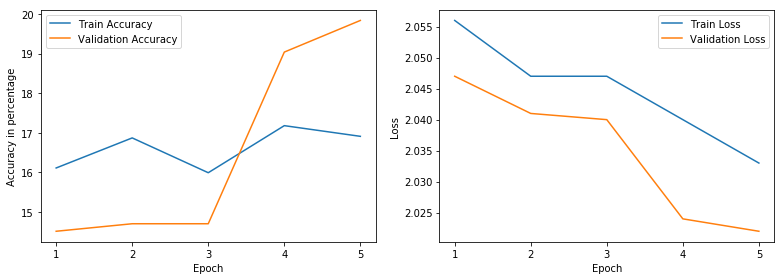

In [91]:
import matplotlib.pyplot as plt
import numpy as np

epochs = [1, 2, 3, 4, 5]
train_results = [16.11, 16.87, 15.99, 17.18, 16.91]
val_results = [14.51, 14.70, 14.70, 19.04, 19.84]

fig = plt.figure(figsize=[11,4])

plt.subplot(121)
plt.plot(train_results, label='Train Accuracy')
plt.plot(val_results, label='Validation Accuracy')
plt.legend()
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
plt.ylabel('Accuracy in percentage')
plt.xlabel('Epoch')


train_loss = [2.056, 2.047, 2.047, 2.040, 2.033]
val_loss = [2.047, 2.041, 2.040, 2.024, 2.022]

plt.subplot(122)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()

plt.savefig('results_of_evaluation.png')